CNN for MNIST and CIFAR10


In [ ]:
import tensorflow as tf
import numpy as np
import os, sys
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks')

## **Fashion MNIST dataset**

---



4423680/4422102 [==============================] - 0s 0us/step
9


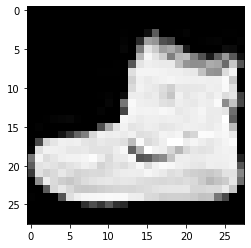

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap='Greys_r')

train_images = train_images.reshape([-1, 28, 28, 1])
train_images = train_images.astype(np.float32) / 255
test_images = test_images.reshape([-1, 28, 28, 1])
test_images = test_images.astype(np.float32) / 255
data = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128).repeat()

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images, test_labels.astype(np.int32))).batch(128)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(28, 3, activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(56, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1400)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               140100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
train_steps = 2500

#model.build((None, 784))  # optional -- note None for the batch axis!!

# opt = tf.optimizers.SGD(0.01)
opt = tf.optimizers.Adam(0.01)

# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (img_batch, lbl_batch) in enumerate(data):
    if step > train_steps:
        break

    with tf.GradientTape() as t:
        logits = model(img_batch)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    varis = model.trainable_variables
    # print(tf.shape(varis[0]))
    grads = t.gradient(xent, varis)

    opt.apply_gradients(zip(grads, varis))
    train_acc_metric(lbl_batch, logits)
      
    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches

        print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.3045406341552734 Accuracy: 0.078125
Loss: 0.4473697543144226 Accuracy: 0.7728906273841858
Loss: 0.36479878425598145 Accuracy: 0.8423437476158142
Loss: 0.32374000549316406 Accuracy: 0.8596093654632568
Loss: 0.37619245052337646 Accuracy: 0.8694531321525574
Loss: 0.24438463151454926 Accuracy: 0.8775845766067505
Loss: 0.35443028807640076 Accuracy: 0.8815624713897705
Loss: 0.3450365662574768 Accuracy: 0.8863281011581421
Loss: 0.365561306476593 Accuracy: 0.88671875
Loss: 0.3136146068572998 Accuracy: 0.8815624713897705
Loss: 0.27420729398727417 Accuracy: 0.8981046080589294
Loss: 0.2324875146150589 Accuracy: 0.893750011920929
Loss: 0.2450474500656128 Accuracy: 0.8974999785423279
Loss: 0.16139301657676697 Accuracy: 0.895703136920929
Loss: 0.2644692063331604 Accuracy: 0.8949999809265137
Loss: 0.23831570148468018 Accuracy: 0.9035087823867798
Loss: 0.21866856515407562 Accuracy: 0.9017968773841858
Loss: 0.2140665501356125 Accuracy: 0.903515636920929
Loss: 0.20977431535720825 Accuracy: 0.902

In [ ]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))
test_acc_metric.reset_states()

Test acc: 0.8899999856948853


### **Dataset: Fashion MNIST**

---

Observation: The CNN model initially had 2 convolution layers with a 3x3 kernel and 2 filters, 2 pooling layers with a pool size of 2x2 and 1 hidden layer of 50 units. The training accuracy of the CNN for FashionMNIST dataset using gradient based optimisation technique is low (0.78). Using Adam optimizer instead increase the accuracy to 0.84. Increasing the number of filters upto 28 further increased the accuracy to 0.91. Reducing the kernel_size to 1x1 increases learning time.


## **CIFAR10 dataset**

---



6


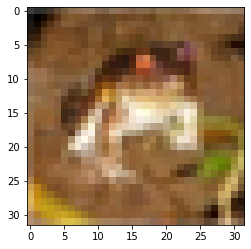

In [ ]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

train_labels = train_labels.reshape((-1))
test_labels = test_labels.reshape((-1))

print(train_labels[0])
plt.imshow(train_images[0])

data = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=50000).batch(128).repeat()

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images, test_labels.astype(np.int32))).batch(128)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, 2, activation='relu', strides=1, input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, 2, activation='relu', strides=1))
model.add(tf.keras.layers.MaxPool2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 31, 31, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               156900    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
train_steps = 2500
epochs = 5

#model.build((None, 784))  # optional -- note None for the batch axis!!

# opt = tf.optimizers.SGD(0.01)
opt = tf.optimizers.Adam(0.01)

# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for epoch in range(epochs):
  print("Epoch %d" % epoch)

  for step, (img_batch, lbl_batch) in enumerate(data):
      if step > train_steps:
          break

      with tf.GradientTape() as t:
          logits = model(img_batch)

          # loss format is generally: first argument targets, second argument outputs
          xent = loss_fn(lbl_batch, logits)

      # if you didn't build the model, it is important that you get the variables
      # AFTER the model has been called the first time
      varis = model.trainable_variables
      # if step == 1:
      #   print(tf.shape(varis[2]))
      grads = t.gradient(xent, varis)

      opt.apply_gradients(zip(grads, varis))
      train_acc_metric(lbl_batch, logits)

      if not step % 100:
          # this is different from before. there, we only evaluated accuracy
          # for one batch. Now, we always average over 100 batches

          print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
          train_acc_metric.reset_states()

Epoch 0
Loss: 2.3374433517456055 Accuracy: 0.1015625
Loss: 1.8036673069000244 Accuracy: 0.33054688572883606
Loss: 1.4669413566589355 Accuracy: 0.4577343761920929
Loss: 1.5181145668029785 Accuracy: 0.48976561427116394
Loss: 1.2398698329925537 Accuracy: 0.5189774036407471
Loss: 1.0561233758926392 Accuracy: 0.5514843463897705
Loss: 1.4907934665679932 Accuracy: 0.5628125071525574
Loss: 1.1835384368896484 Accuracy: 0.5659375190734863
Loss: 1.1088889837265015 Accuracy: 0.5797522068023682
Loss: 1.2184773683547974 Accuracy: 0.5901562571525574
Loss: 1.003043532371521 Accuracy: 0.5995312333106995
Loss: 0.9877054691314697 Accuracy: 0.5992187261581421
Loss: 1.1366039514541626 Accuracy: 0.6077477931976318
Loss: 1.087774634361267 Accuracy: 0.6114843487739563
Loss: 0.8745763897895813 Accuracy: 0.6171093583106995
Loss: 1.0169432163238525 Accuracy: 0.6263281106948853
Loss: 1.0294389724731445 Accuracy: 0.620216429233551
Loss: 0.9745742082595825 Accuracy: 0.6310155987739563
Loss: 0.9002265930175781 Accur

In [ ]:
# this is very convenient -- before, we usually had code that
# evaluates the whole test set at once -- this won't work for
# large datasets/models. With metrics, we can just iterate
# over the data and the metric takes care of averaging etc.

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))
test_acc_metric.reset_states()

Test acc: 0.6035000085830688


### **Dataset: CIFAR10**

---

Observation: The CIFAR10 dataset is trained on the same model as for the fashionMNIST. Here, we obtain training accuracy of 0.6 and a testing accuracy of 0.56. Reducing the number of filters to 16 and 32 for each convulation layer increases the training and testing accuracy to 0.64 and 0.59 respectively. Decreasing the kernel size to 2x2 increases the accuracy to 0.68 and 0.63 while increasing the kernel size decreases the accuracy. Increasing the number of hidden layers of the MLP does not change the training accuracy, instead increases the margin between the training and testing accuracy. Increasing the number of training steps does not affect the accuracy but increases the time taken to train the dataset.Increasing the number of epochs only increases the training accuracy and hence causes overfitting.